In [1]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

seed = 123143
np.random.seed(seed)

x = dados.drop(columns=['id', 'diagnostico'])
y = dados['diagnostico']

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3)

In [3]:
display(raw_treino_x.head())
display(treino_y.head())

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
268,12.87,16.21,82.38,103.78,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,...,89.27,597.5,0.1256,0.1808,0.1992,0.786,0.0578,0.3604,0.07062,NaN
422,11.61,16.02,75.46,103.78,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,...,81.93,475.7,0.1415,0.2170,0.2302,0.786,0.1105,0.2787,0.07427,NaN
168,17.47,24.68,116.10,103.78,984.6,0.10490,0.16030,0.21590,0.10430,0.1538,...,155.30,1660.0,0.1376,0.3830,0.4890,0.786,0.1721,0.2160,0.09300,NaN
501,13.82,24.49,92.33,103.78,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,...,106.00,788.0,0.1794,0.3966,0.3381,0.786,0.1521,0.3651,0.11830,0.073513
563,20.92,25.09,143.00,103.78,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,179.10,1819.0,0.1407,0.4186,0.6599,0.786,0.2542,0.2929,0.09873,NaN


268    B
422    B
168    M
501    M
563    M
Name: diagnostico, dtype: object

In [4]:
print(treino_y.shape)
print(raw_treino_x.shape)

(398,)
(398, 33)


In [5]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=100)
modelo.fit(raw_treino_x, treino_y)
modelo.score(raw_teste_x, teste_y)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [6]:
dados.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [7]:
seed = 123143
np.random.seed(seed)

x = dados.drop(columns=['id', 'diagnostico', 'exame_33'])
y = dados['diagnostico']

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3)

In [8]:
modelo = RandomForestClassifier(n_estimators=100)
modelo.fit(raw_treino_x, treino_y)
modelo.score(raw_teste_x, teste_y) * 100

92.39766081871345

In [9]:
from sklearn.dummy import DummyClassifier
# como parâmetro para o dummy podemos passar a estratégia usada: stratified, most_frequent, prior, uniform, constant
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(raw_treino_x, treino_y)
dummy.score(raw_teste_x, teste_y) * 100



66.66666666666666

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_3188\2571341936.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.show()


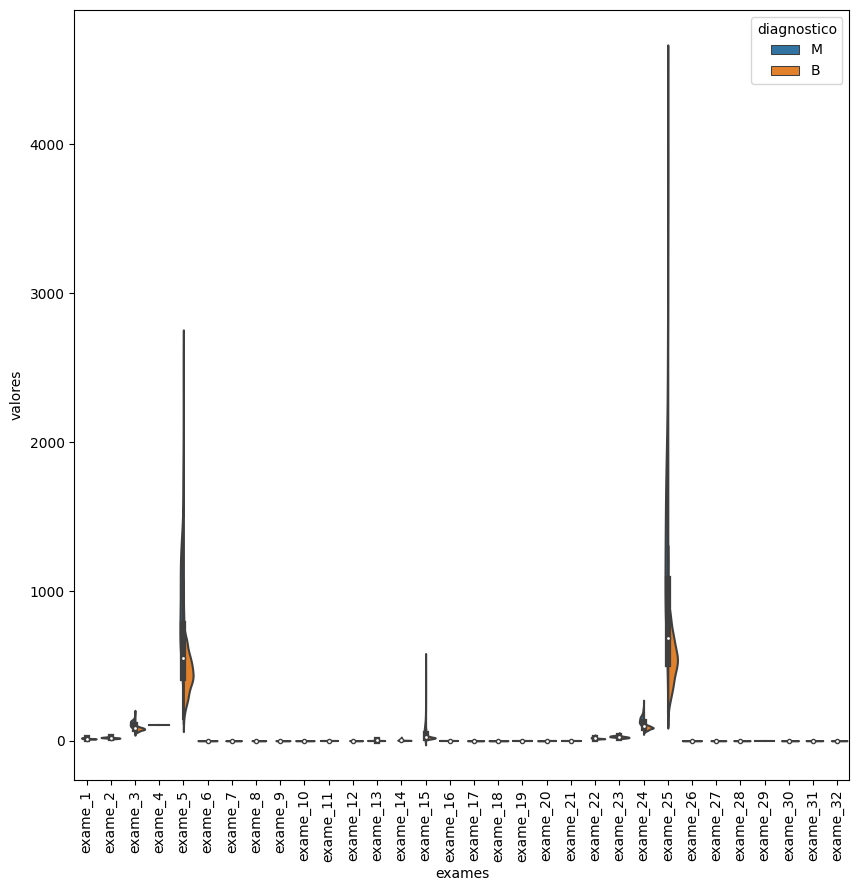

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dados_plot = pd.concat([y, x], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

ax = plt.figure(figsize=(10, 10))
sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot, split=True)
plt.xticks(rotation = 90)
ax.show()

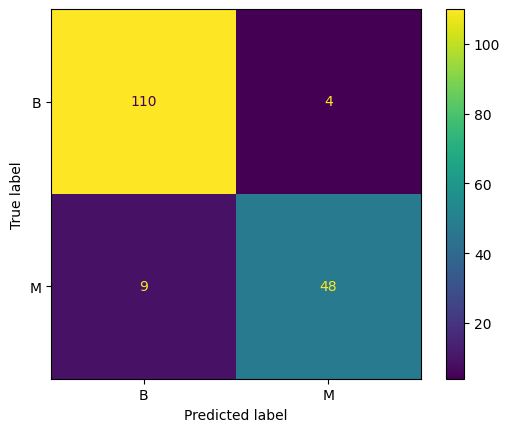

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(teste_y, modelo.predict(raw_teste_x), labels=teste_y.unique())
plt.grid(False)

In [14]:
from sklearn.feature_selection import RFE

selecao_rfe = RFE(estimator=modelo  , n_features_to_select=5, step=1)
selecao_rfe.fit(raw_treino_x, treino_y)
treino_rfe = selecao_rfe.transform(raw_treino_x)
teste_rfe = selecao_rfe.transform(raw_teste_x)

<AxesSubplot: >

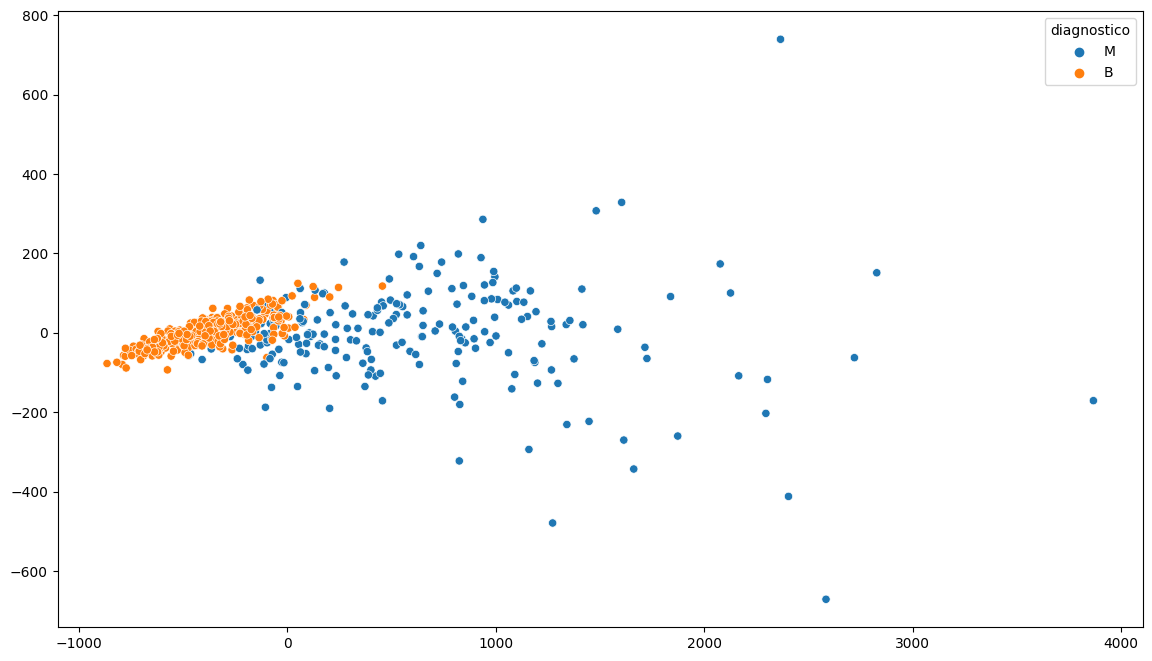

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
valores_pca = pca.fit_transform(x)
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_pca[:,0], y=valores_pca[:,1], hue=y)